# Fault Classification
- **Objective:** To classify fault types

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Split data for training and testing
from sklearn.preprocessing import LabelEncoder  # Convert text to numbers
from sklearn.tree import DecisionTreeClassifier  # Ml model
from sklearn.metrics import classification_report, confusion_matrix  # Check how well the model works

In [2]:
# Read data file
df = pd.read_csv('lighting_data_cleaned.csv')

# Display data
df

,light_id,location_name,fault_type,timestamp,severity_level,fault_status,maintenance_cost,year,month,day,day_of_week,hour
0,L0313,Jurong West,Power-Related,2020-01-07 09:05:35,Low,Closed,297.45,2020,1,7,Tuesday,9
1,L0385,Pasir Ris,Environmental,2020-01-07 10:28:12,Medium,In Progress,172.61,2020,1,7,Tuesday,10
2,L0158,Canberra,Communication,2020-01-07 13:09:56,Medium,Detected,381.23,2020,1,7,Tuesday,13
3,L0554,Jurong West,Communication,2020-01-08 01:55:51,Medium,In Progress,284.30,2020,1,8,Wednesday,1
4,L0755,Bishan,Communication,2020-01-11 10:49:07,Critical,In Progress,76.52,2020,1,11,Saturday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
163,L0768,Chinatown,Cybersecurity,2020-12-24 21:14:30,Critical,Detected,156.92,2020,12,24,Thursday,21
164,L0716,Pasir Ris,Control System,2020-12-26 03:30:47,High,Closed,262.23,2020,12,26,Saturday,3
165,L0085,Toa Payoh,Communication,2020-12-27 02:25:18,Medium,Closed,377.93,2020,12,27,Sunday,2
166,L0525,Pasir Ris,Control System,2020-12-28 00:39:48,Low,In Progress,191.01,2020,12,28,Monday,0


In [3]:
# Convert fault_type from text to numbers due to ml works on numbers
fault_encoder = LabelEncoder()
df['fault_encoded'] = fault_encoder.fit_transform(df['fault_type'])

# Display fault_encoded column
df[['fault_type', 'fault_encoded']]

,fault_type,fault_encoded
0,Power-Related,4
1,Environmental,3
2,Communication,0
3,Communication,0
4,Communication,0
...,...,...
163,Cybersecurity,2
164,Control System,1
165,Communication,0
166,Control System,1


In [4]:
# Apply One-hot encoding using pd.get_dummies to create new columns(0 or 1)
df_encoded = pd.get_dummies(df, columns=['location_name', 'fault_status', 'severity_level'])

# Check the new columns
df_encoded.columns

Index(['light_id', 'fault_type', 'timestamp', 'maintenance_cost', 'year',
       'month', 'day', 'day_of_week', 'hour', 'fault_encoded',
       'location_name_Bishan', 'location_name_Bugis Junction',
       'location_name_Canberra', 'location_name_Chinatown',
       'location_name_City Hall', 'location_name_Jurong West',
       'location_name_Orchard Road', 'location_name_Outram Park',
       'location_name_Pasir Ris', 'location_name_Toa Payoh',
       'fault_status_Acknowledged', 'fault_status_Closed',
       'fault_status_Detected', 'fault_status_In Progress',
       'fault_status_Resolved', 'severity_level_Critical',
       'severity_level_High', 'severity_level_Informational',
       'severity_level_Low', 'severity_level_Medium'],
      dtype='object')

In [5]:
# Drop unused columns
df_encoded = df_encoded.drop(columns= ['light_id', 'timestamp', 'fault_type', 'maintenance_cost',	'year', 'day_of_week'])

# Check the new columns
df_encoded.head()

,month,day,hour,fault_encoded,location_name_Bishan,location_name_Bugis Junction,location_name_Canberra,location_name_Chinatown,location_name_City Hall,location_name_Jurong West,...,fault_status_Acknowledged,fault_status_Closed,fault_status_Detected,fault_status_In Progress,fault_status_Resolved,severity_level_Critical,severity_level_High,severity_level_Informational,severity_level_Low,severity_level_Medium
0,1,7,9,4,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
1,1,7,10,3,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1,7,13,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,1,8,1,0,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,1,11,10,0,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [6]:
# Split data feature X (input data points use to predict) & label y (output/target data points want to predict)

# Remove the fault_encoded column
X = df_encoded.drop('fault_encoded', axis=1)

# Target is fault_encoded
y = df_encoded['fault_encoded']

In [7]:
# Split data into training (teach model) and testing (check accuracy)
# random_state get same split each run

# X_train (input features), y_train (severity labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train (fit) the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Use the trained model to predict severity on test data
y_pred = clf.predict(X_test)

# Evaluate model performance
# Print detailed metrics showing how good predictions are
print(classification_report(y_test, y_pred, target_names=fault_encoder.classes_))

                precision    recall  f1-score   support

 Communication       0.33      0.33      0.33         6
Control System       0.14      0.09      0.11        11
 Cybersecurity       0.00      0.00      0.00         3
 Environmental       0.25      0.14      0.18         7
 Power-Related       0.20      0.33      0.25         3
Sensor-Related       0.20      0.25      0.22         4

      accuracy                           0.18        34
     macro avg       0.19      0.19      0.18        34
  weighted avg       0.20      0.18      0.18        34



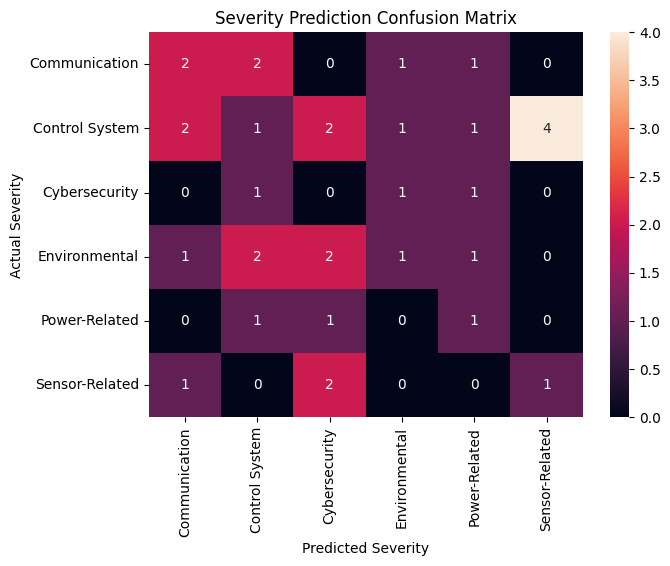

In [10]:
# Show confusion matrix heatmap to visualize errors and correct predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))

sns.heatmap(
    cm,                         # The confusion matrix data as a 2D array (counts of predicted vs actual)
    annot=True,                 # Display the numerical values inside each heatmap cell
    fmt='d',                   # Format those numbers as integers (decimal format)
    xticklabels=fault_encoder.classes_,  # Labels for x-axis ticks (predicted fault categories)
    yticklabels=fault_encoder.classes_   # Labels for y-axis ticks (actual fault categories)
)

plt.xlabel('Predicted Severity')
plt.ylabel('Actual Severity')
plt.title('Severity Prediction Confusion Matrix')
plt.show()